# Multilayer Perceptron (MLP)

### Introduction
This report details the implementation and results of experimenting with different numbers of neurons in the hidden layers of a Multi-Layer Perceptron (MLP) for classifying the MNIST dataset using PyTorch. The goal is to understand how the number of neurons affects the model’s accuracy.

### Data Preparation
The MNIST dataset, consisting of 28x28 grayscale images of handwritten digits (0-9), is loaded and preprocessed using the `torchvision` library. The images are transformed into tensors and normalized with a mean of 0.1307 and a standard deviation of 0.3081.

In [1]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.1307,), (0.3081,))])

train_set = datasets.MNIST('./MNIST/', train=True, transform=transform, download=True)
test_set = datasets.MNIST('./MNIST/', train=False, transform=transform, download=True)

train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=True)

### Model Architecture
The MLP model consists of two hidden layers with ReLU activation functions. The number of neurons in the hidden layers is varied to study its impact on the model’s performance. The output layer has 10 neurons, corresponding to the 10 digit classes.

Note:
- PyTorch to define a simple NN model (MLP), runs with GPU if available
- Model initialized with 28*28 as input, and vector size of 10 as output
ReLU is used as output

![Image](https://tgmstat.wordpress.com/wp-content/uploads/2013/05/multiclass_neural_network_example.png)

In [2]:
import torch
import torch.nn as nn

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class MLP(nn.Module):
    def __init__(self, neurons):
        super(MLP, self).__init__()
        self.hidden1 = nn.Linear(28*28, neurons)
        self.hidden2 = nn.Linear(neurons, neurons)
        self.output = nn.Linear(neurons, 10)
        self.relu = nn.ReLU()
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.relu(self.hidden1(x))
        x = self.relu(self.hidden2(x))
        x = self.output(x)
        return x

#model = MLP(neurons).to(device)
#print(model)

### Training and Evaluation
The model is trained for 20 epochs using the Adam optimizer and CrossEntropyLoss. During each epoch, the model’s parameters are updated based on the training data, and the training loss and accuracy are calculated.\
\
After training, the model is evaluated on the test set to determine its generalization performance. The evaluation is done in a separate loop to ensure the model is in evaluation mode and no gradients are calculated.

In [3]:
# Training and evaluation function
def train_and_evaluate(neurons):
    model = MLP(neurons).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    criterion = nn.CrossEntropyLoss()

    epochs = 20
    model.train()
    for epoch in range(epochs):
        for batch_num, input_data in enumerate(train_loader):
            optimizer.zero_grad()
            x, y = input_data
            x = x.to(device).float()
            y = y.to(device)

            output = model(x)
            loss = criterion(output, y)
            loss.backward()
            optimizer.step()

    # Evaluation
    model.eval()
    test_correct = 0
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            inputs = inputs.to(device).float()
            labels = labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            test_correct += (predicted == labels).sum().item()

    test_accuracy = test_correct / len(test_set)
    return test_accuracy

### Experimentation
The model is trained and evaluated with different numbers of neurons in the hidden layers: 4, 8, 16, 32, 64, 128, and 256. The test accuracy for each configuration is recorded and plotted.

Neurons: 4 | Test Accuracy: 85.22%
Neurons: 8 | Test Accuracy: 88.69%
Neurons: 16 | Test Accuracy: 91.48%
Neurons: 32 | Test Accuracy: 95.15%
Neurons: 64 | Test Accuracy: 96.03%
Neurons: 128 | Test Accuracy: 96.75%
Neurons: 256 | Test Accuracy: 96.23%


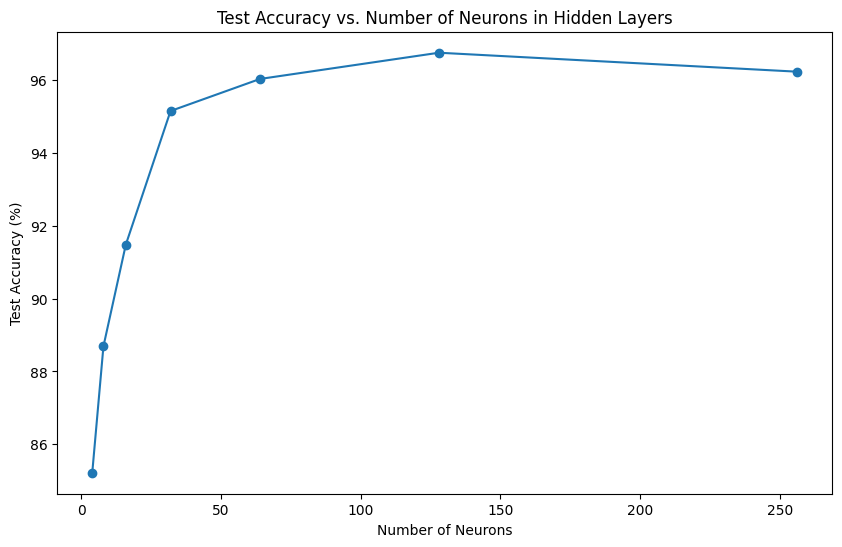

In [4]:
# Experiment with different numbers of neurons
import matplotlib.pyplot as plt
neuron_counts = [4, 8, 16, 32, 64, 128, 256]
accuracies = []

for neurons in neuron_counts:
    accuracy = train_and_evaluate(neurons)
    accuracies.append(accuracy)
    print(f'Neurons: {neurons} | Test Accuracy: {accuracy*100:.2f}%')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(neuron_counts, [acc * 100 for acc in accuracies], marker='o')
plt.title('Test Accuracy vs. Number of Neurons in Hidden Layers')
plt.xlabel('Number of Neurons')
plt.ylabel('Test Accuracy (%)')
plt.show()

### Results
The test accuracies for different numbers of neurons are as follows:
- 4 neurons:   85.22%
- 8 neurons:   88.69%
- 16 neurons:  91.48%
- 32 neurons:  95.15%
- 64 neurons:  96.03%
- **128 neurons: 96.75% (Highest)**
- 256 neurons: 96.23%

### Discussion
The results indicate that increasing the number of neurons in the hidden layers generally improves the model’s accuracy up to 128 neurons. However, beyond 128 neurons, the accuracy decrease due to overfitting.

### Conclusion
Experimenting with different numbers of neurons in the hidden layers provides valuable insights into the model’s performance. The optimal number of neurons (N=128) balances model complexity and generalization ability.

### Future Work
1. **Hyperparameter Tuning**
- Implement grid search to explore which sets of hyperparameters work the best, such as learning rate, batch size, number of epochs.
2. **Dropout**
- Experiment with different dropout rates to prevent overfitting.